In [1]:
import tensorflow as tf 
import glob
import random
import pathlib
import numpy
import os
import matplotlib
from matplotlib import pyplot as plt

In [3]:
cat=glob.glob('E:/mydata/dc/train/cat.*?.jpg')
cat

['E:/mydata/dc/train\\cat.0.jpg',
 'E:/mydata/dc/train\\cat.1.jpg',
 'E:/mydata/dc/train\\cat.10.jpg',
 'E:/mydata/dc/train\\cat.100.jpg',
 'E:/mydata/dc/train\\cat.1000.jpg',
 'E:/mydata/dc/train\\cat.10000.jpg',
 'E:/mydata/dc/train\\cat.10001.jpg',
 'E:/mydata/dc/train\\cat.10002.jpg',
 'E:/mydata/dc/train\\cat.10003.jpg',
 'E:/mydata/dc/train\\cat.10004.jpg',
 'E:/mydata/dc/train\\cat.10005.jpg',
 'E:/mydata/dc/train\\cat.10006.jpg',
 'E:/mydata/dc/train\\cat.10007.jpg',
 'E:/mydata/dc/train\\cat.10008.jpg',
 'E:/mydata/dc/train\\cat.10009.jpg',
 'E:/mydata/dc/train\\cat.1001.jpg',
 'E:/mydata/dc/train\\cat.10010.jpg',
 'E:/mydata/dc/train\\cat.10011.jpg',
 'E:/mydata/dc/train\\cat.10012.jpg',
 'E:/mydata/dc/train\\cat.10013.jpg',
 'E:/mydata/dc/train\\cat.10014.jpg',
 'E:/mydata/dc/train\\cat.10015.jpg',
 'E:/mydata/dc/train\\cat.10016.jpg',
 'E:/mydata/dc/train\\cat.10017.jpg',
 'E:/mydata/dc/train\\cat.10018.jpg',
 'E:/mydata/dc/train\\cat.10019.jpg',
 'E:/mydata/dc/train\\cat.1

In [4]:
dog=glob.glob('E:/mydata/dc/train/dog.*?.jpg')

In [5]:
gpus = tf.config.experimental.list_physical_devices(device_type='GPU')
cpus = tf.config.experimental.list_physical_devices(device_type='CPU')
print(gpus, cpus)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')] [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [6]:
all_img_list=cat[0:3000]+dog[0:3000]
random.shuffle(all_img_list)
len(all_img_list)

6000

In [7]:
name=['dog','cat']
name_index=dict((name, index) for index,name in enumerate(name))
name_index

{'dog': 0, 'cat': 1}

In [8]:
d='E:/mydata/dc/train\\dog.1465.jpg'
d.split('.')[0].split('\\')[1]

'dog'

In [9]:
def kill(path):
    d=path
    c=d.split('.')[0].split('\\')[1]
    return c

In [10]:
ds=map(kill,all_img_list)
all_img_name=[name_index[i]for i in ds]
all_img_name

[0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,


In [11]:
def load_preprosess_image(path,lenbers):
    imgs=tf.io.read_file(path)#用TensorFlow读取图片
    imgs=tf.image.decode_jpeg(imgs,channels=3)#解码读取的图片
    imgs=tf.image.resize(imgs,[150,150])#规定图片的大小，裁剪格式
    imgs=tf.cast(imgs,tf.float32)#把图片解析成数组
    imgs=imgs/255    #让解析出来的数组归一化
    lenbers=tf.reshape(lenbers,[1])
    return imgs,lenbers

In [12]:
data_all_list=tf.data.Dataset.from_tensor_slices((all_img_list,all_img_name))
AUTOTUNE = tf.data.experimental.AUTOTUNE
data_all_list=data_all_list.map(load_preprosess_image,num_parallel_calls=AUTOTUNE)
data_all_list

<ParallelMapDataset shapes: ((150, 150, 3), (1,)), types: (tf.float32, tf.int32)>

In [13]:
tain_datas=data_all_list.take(len(all_img_list))
tain_data=tain_datas.repeat().shuffle(buffer_size=len(all_img_list)).batch(16)

In [14]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(64,(3,3),input_shape=(150,150,3),activation='relu',padding='same',strides=(1,1)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2),padding='same'))
model.add(tf.keras.layers.Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512,activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(256,activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 64)      1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 150, 150, 64)      256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 64)      36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 150, 150, 64)      256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 128)       73856     
_________________________________________________________________
batch_normalization_2 (Batch (None, 75, 75, 128)       5

In [16]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=1e-4),loss='binary_crossentropy',metrics=['acc'])

In [17]:
nums=len(all_img_list)//20

In [18]:
tf.keras.backend.clear_session()

In [19]:
model.fit(tain_data,epochs=10,steps_per_epoch=nums)

Train for 300 steps
Epoch 1/10
300/300 [==============================] - 52s 172ms/step - loss: 0.6492 - acc: 0.6944
Epoch 2/10
300/300 [==============================] - 44s 146ms/step - loss: 0.5105 - acc: 0.7596
Epoch 3/10
300/300 [==============================] - 44s 146ms/step - loss: 0.4398 - acc: 0.7935
Epoch 4/10
300/300 [==============================] - 44s 147ms/step - loss: 0.3646 - acc: 0.8381
Epoch 5/10
300/300 [==============================] - 44s 147ms/step - loss: 0.3012 - acc: 0.8719
Epoch 6/10
300/300 [==============================] - 44s 146ms/step - loss: 0.2441 - acc: 0.8998
Epoch 7/10
300/300 [==============================] - 44s 146ms/step - loss: 0.1819 - acc: 0.9250
Epoch 8/10
300/300 [==============================] - 44s 147ms/step - loss: 0.1438 - acc: 0.9450
Epoch 9/10
300/300 [==============================] - 44s 147ms/step - loss: 0.1247 - acc: 0.9550
Epoch 10/10
300/300 [==============================] - 44s 147ms/step - loss: 0.1026 - acc: 0.9602

In [20]:
model.save('E:/杂物/dog_and_cat.h5')

In [29]:
history=model.history

In [30]:
history.history.keys()

dict_keys(['loss', 'acc'])

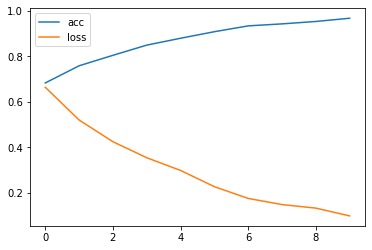

In [31]:
plt.plot(history.epoch, history.history.get('acc'), label='acc')
plt.plot(history.epoch, history.history.get('loss'), label='loss')
plt.legend()

In [75]:
test=glob.glob('D:mydata/dc/test/[1][0-9].jpg')
test

['D:mydata/dc/test\\10.jpg',
 'D:mydata/dc/test\\11.jpg',
 'D:mydata/dc/test\\12.jpg',
 'D:mydata/dc/test\\13.jpg',
 'D:mydata/dc/test\\14.jpg',
 'D:mydata/dc/test\\15.jpg',
 'D:mydata/dc/test\\16.jpg',
 'D:mydata/dc/test\\17.jpg',
 'D:mydata/dc/test\\18.jpg',
 'D:mydata/dc/test\\19.jpg']

In [76]:
def dclist(paths):
    img=tf.io.read_file(paths)
    img=tf.image.decode_jpeg(img,channels=3)
    img=tf.image.resize(img,[150,150])
    img=tf.cast(img,tf.float32)
    img=img/255
    return img

In [77]:
test_list=tf.data.Dataset.from_tensor_slices(test)
test_list=test_list.map(dclist)
test_list=test_list.batch(16)

In [78]:
data=model.predict(test_list)

In [79]:
for i in data:
    print('%.3f'%i)

0.999
0.999
0.293
1.000
0.964
0.972
1.000
0.643
0.001
0.936
